In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Project6/')
!pwd

/content/drive/MyDrive/Project6


In [ ]:
import string
from numpy import array
from pickle import dump, load
import numpy as np
from numpy import asarray, zeros
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional
from random import randint
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import os

In [ ]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# turn a doc into clean tokens
def clean_doc(doc):
	# replace '--' with a space ' '
	# doc = doc.replace('--', ' ')
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# make lower case
	tokens = [word.lower() for word in tokens]
	return tokens

# save tokens to file, one dialog per line
def save_doc(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

res = []
dirPath = r'dataset_text_clean'
path = os.getcwd()
dir_path = os.path.join(path , dirPath)
subDir = ''
# list to store files
# Iterate directory
j = 0
for file_path in os.listdir(dir_path):
	subDir = file_path
	if j == 2:
		for file in  os.listdir(os.path.join(dir_path, file_path)):
				# check if current file_path is a file
			if os.path.isfile(os.path.join(dir_path, file_path, file)):
					# add filename to list
				res.append(os.path.join(dir_path, file_path, file))
		# break
	j += 1
print ( len (res))
print(res)

37
['/content/drive/MyDrive/Project6/dataset_text_clean/العصر الأندلسي/أبو البقاء الرندي.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الأندلسي/أبو إسحاق الألبيري.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الأندلسي/ابن الزقاق البلنسي.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الأندلسي/ابن خفاجة.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الأندلسي/ابن دارج القسطلي.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الأندلسي/ابن زمرك.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الأندلسي/ابن سهل الأندلسي.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الأندلسي/ابن شهاب.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الأندلسي/ابن شهيد.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الأندلسي/ابن عبد ربه.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الأندلسي/ابن معتوق.txt', '/content/drive/MyDrive/Proj

In [ ]:
# load document
text = ''
for i in range(len (res)):
	text += load_doc(res[i]) +'\n'

# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')
print(text[:200])

Length of text: 5591238 characters
ألثام شف 
الثام شف ند ام غمام ضحكت برد ام علي الازرار حلتها بدر تم قضيب املد بابي لين انه نقلت عطفته لخلد والحاظ ساحره نفثت القلب العقد طلبت الثار ظالما وانا القاتل نفسي بيدي نظرت عيني لحيني نظره اخذت


In [ ]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

62 unique characters


In [ ]:
example_texts = ['ابتثججخدذرز', 'هون']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
print ("chars ={}".format(chars))

chars =<tf.RaggedTensor [[b'\xd8\xa7', b'\xd8\xa8', b'\xd8\xaa', b'\xd8\xab', b'\xd8\xac',
  b'\xd8\xac', b'\xd8\xae', b'\xd8\xaf', b'\xd8\xb0', b'\xd8\xb1',
  b'\xd8\xb2']                                                    ,
 [b'\xd9\x87', b'\xd9\x88', b'\xd9\x86']]>


In [ ]:
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)

ids = ids_from_chars(chars)
print ("chars ={}".format(chars))
print ("ids ={}".format(ids))

chars =<tf.RaggedTensor [[b'\xd8\xa7', b'\xd8\xa8', b'\xd8\xaa', b'\xd8\xab', b'\xd8\xac',
  b'\xd8\xac', b'\xd8\xae', b'\xd8\xaf', b'\xd8\xb0', b'\xd8\xb1',
  b'\xd8\xb2']                                                    ,
 [b'\xd9\x87', b'\xd9\x88', b'\xd9\x86']]>
ids =<tf.RaggedTensor [[18, 19, 21, 22, 23, 23, 25, 26, 27, 28, 29], [45, 46, 44]]>


In [ ]:
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(),
															 invert=True, mask_token=None)

chars = chars_from_ids(ids)
print ("chars ={}".format(chars))

chars =<tf.RaggedTensor [[b'\xd8\xa7', b'\xd8\xa8', b'\xd8\xaa', b'\xd8\xab', b'\xd8\xac',
  b'\xd8\xac', b'\xd8\xae', b'\xd8\xaf', b'\xd8\xb0', b'\xd8\xb1',
  b'\xd8\xb2']                                                    ,
 [b'\xd9\x87', b'\xd9\x88', b'\xd9\x86']]>


In [ ]:
tf.strings.reduce_join(chars, axis=-1).numpy()

array([b'\xd8\xa7\xd8\xa8\xd8\xaa\xd8\xab\xd8\xac\xd8\xac\xd8\xae\xd8\xaf\xd8\xb0\xd8\xb1\xd8\xb2',
       b'\xd9\x87\xd9\x88\xd9\x86'], dtype=object)

In [ ]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
print ("all_ids ={}".format(all_ids))

all_ids =[14 42 22 ... 42  1  1]


In [ ]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [ ]:
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

أ
ل
ث
ا
م
 
ش
ف
 




In [ ]:
seq_length = 100

In [ ]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)
for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'\xd8\xa3' b'\xd9\x84' b'\xd8\xab' b'\xd8\xa7' b'\xd9\x85' b' '
 b'\xd8\xb4' b'\xd9\x81' b' ' b'\n' b'\xd8\xa7' b'\xd9\x84' b'\xd8\xab'
 b'\xd8\xa7' b'\xd9\x85' b' ' b'\xd8\xb4' b'\xd9\x81' b' ' b'\xd9\x86'
 b'\xd8\xaf' b' ' b'\xd8\xa7' b'\xd9\x85' b' ' b'\xd8\xba' b'\xd9\x85'
 b'\xd8\xa7' b'\xd9\x85' b' ' b'\xd8\xb6' b'\xd8\xad' b'\xd9\x83'
 b'\xd8\xaa' b' ' b'\xd8\xa8' b'\xd8\xb1' b'\xd8\xaf' b' ' b'\xd8\xa7'
 b'\xd9\x85' b' ' b'\xd8\xb9' b'\xd9\x84' b'\xd9\x8a' b' ' b'\xd8\xa7'
 b'\xd9\x84' b'\xd8\xa7' b'\xd8\xb2' b'\xd8\xb1' b'\xd8\xa7' b'\xd8\xb1'
 b' ' b'\xd8\xad' b'\xd9\x84' b'\xd8\xaa' b'\xd9\x87' b'\xd8\xa7' b' '
 b'\xd8\xa8' b'\xd8\xaf' b'\xd8\xb1' b' ' b'\xd8\xaa' b'\xd9\x85' b' '
 b'\xd9\x82' b'\xd8\xb6' b'\xd9\x8a' b'\xd8\xa8' b' ' b'\xd8\xa7'
 b'\xd9\x85' b'\xd9\x84' b'\xd8\xaf' b' ' b'\xd8\xa8' b'\xd8\xa7'
 b'\xd8\xa8' b'\xd9\x8a' b' ' b'\xd9\x84' b'\xd9\x8a' b'\xd9\x86' b' '
 b'\xd8\xa7' b'\xd9\x86' b'\xd9\x87' b' ' b'\xd9\x86' b'\xd9\x82'
 b'\xd9\x84' b'\x

In [ ]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy().decode('utf-8'))

ألثام شف 
الثام شف ند ام غمام ضحكت برد ام علي الازرار حلتها بدر تم قضيب املد بابي لين انه نقلت عطفته 
لخلد والحاظ ساحره نفثت القلب العقد طلبت الثار ظالما وانا القاتل نفسي بيدي نظرت عيني لحيني نظره اخذت ر
وحي وخلت جسدي هاتها باله مرضاتها قهوه شفاء الكمد عصرت بالطف عصر الصبا فرمت بالمسك بالزبد دري مديرها ك
اسها وهي البارق المتقد دره ضمت علي ياقوته ام لجين ثوب عسجدي سقني اني حنفي الراي والمعتقد اري بالسكر ا
لا هوي او هبات الملك المءيد ملك العليا انصفته فتحت الام افند
لكل شيء اذا ماتمّ ( رثاء الأندلس ) 
لكل 


In [ ]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [ ]:
# split_input_target(list("Tensorflow"))
split_input_target(list("بسم الله "))

(['ب', 'س', 'م', ' ', 'ا', 'ل', 'ل', 'ه'],
 ['س', 'م', ' ', 'ا', 'ل', 'ل', 'ه', ' '])

In [ ]:
dataset = sequences.map(split_input_target)
dataset

<_MapDataset element_spec=(TensorSpec(shape=(100,), dtype=tf.int64, name=None), TensorSpec(shape=(100,), dtype=tf.int64, name=None))>

In [ ]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy().decode('utf-8'))
    print("Target:", text_from_ids(target_example).numpy().decode('utf-8'))


Input : ألثام شف 
الثام شف ند ام غمام ضحكت برد ام علي الازرار حلتها بدر تم قضيب املد بابي لين انه نقلت عطفته
Target: لثام شف 
الثام شف ند ام غمام ضحكت برد ام علي الازرار حلتها بدر تم قضيب املد بابي لين انه نقلت عطفته 


In [ ]:
# Create training batches
# Batch size
BATCH_SIZE = 1024

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000


# Build The Model
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024



dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

print (dataset)


<_PrefetchDataset element_spec=(TensorSpec(shape=(1024, 100), dtype=tf.int64, name=None), TensorSpec(shape=(1024, 100), dtype=tf.int64, name=None))>


In [ ]:
import json
# EXPORT MODEL CONFIG
settings = {
	'seq_length': seq_length,
	'embedding_dim': embedding_dim,
	'rnn_units': rnn_units,
  # 'chars_from_ids':chars_from_ids,
  # 'ids_from_chars':ids_from_chars,
	'vocab': ids_from_chars.get_vocabulary(),
	# 'val_file': validation_file
}

save_dir = "outputBilstm/"
if not os.path.exists(save_dir):
  os.makedirs(save_dir)

with open(os.path.join(save_dir, "config.json"), "w") as settings_file:
  print("exporting config file", os.path.join(save_dir, "config.json"))
  json.dump(settings, settings_file)



exporting config file outputBilstm/config.json


In [ ]:
import tensorflow as tf

class MyModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, lstm_units):
        super().__init__(self)
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.lstm = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(lstm_units,
                                 return_sequences=True,
                                 return_state=True))
        self.dense = tf.keras.layers.Dense(vocab_size)

    def call(self, inputs, states=None, return_state=False, training=False):
        x = inputs
        x = self.embedding(x, training=training)

        if states is None:
            # For LSTM, the initial state is a tuple (h0, c0) where h0 and c0 are the hidden and cell states.
            # For Bidirectional LSTM, we need to provide initial states for both forward and backward directions.
            states = [tf.zeros((tf.shape(x)[0], self.lstm.forward_layer.units)) for _ in range(2)]
            states += [tf.zeros((tf.shape(x)[0], self.lstm.backward_layer.units)) for _ in range(2)]

        x, forward_h, forward_c, backward_h, backward_c = self.lstm(x, initial_state=states, training=training)
        x = self.dense(x, training=training)

        if return_state:
            return x, [forward_h, forward_c, backward_h, backward_c]
        else:
            return x

# Example usage
vocab_size = 10000
embedding_dim = 256
lstm_units = 512

model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    lstm_units=lstm_units)


In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")


(1024, 100, 10000) # (batch_size, sequence_length, vocab_size)


In [ ]:
# sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
# sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

In [ ]:
# sampled_indices

In [ ]:
# print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
# print()
# print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

In [ ]:
# example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
# print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
# print("Mean loss:        ", example_batch_mean_loss)

In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "my_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     multiple                  2560000   
                                                                 
 bidirectional_7 (Bidirecti  multiple                  3149824   
 onal)                                                           
                                                                 
 dense_7 (Dense)             multiple                  10250000  
                                                                 
Total params: 15959824 (60.88 MB)
Trainable params: 15959824 (60.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


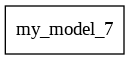

In [ ]:
# representation of model layers
tf.keras.utils.plot_model(model, to_file='outputBilstm/model.png',
                          show_shapes=True,
                          show_dtype=False,
                          show_layer_names=True,
                          rankdir="TB",
                          expand_nested=False,
                          dpi=96,
                          layer_range=None,
                          show_layer_activations=False,
                          show_trainable=False
                          )

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './outputBilstm/training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)


In [ ]:
EPOCHS = 5
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])


Epoch 1/5
54/54 [==============================] - 176s 3s/step - loss: 3.6615 - accuracy: 0.1695
Epoch 2/5
 7/54 [==>...........................] - ETA: 2:26 - loss: 2.9360 - accuracy: 0.1795

ResourceExhaustedError: ignored

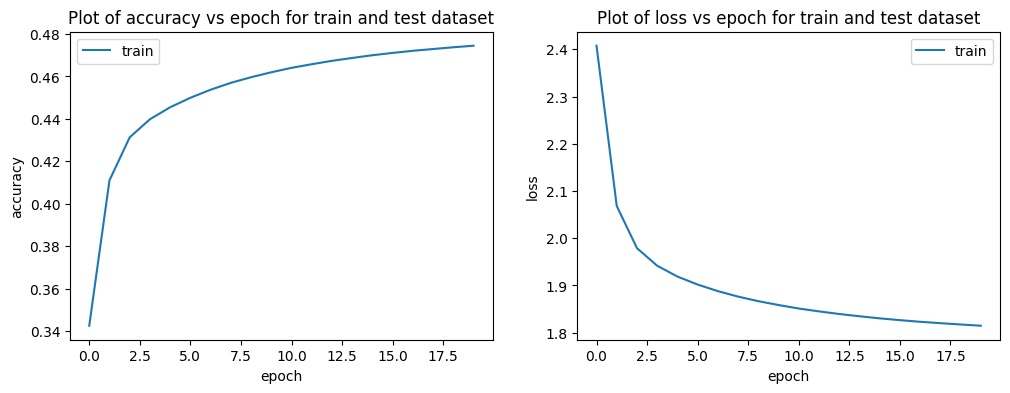

In [ ]:
import matplotlib.pyplot as plt
# epochs_range = range(EPOCHS)
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'])
# plt.title("Plot of loss vs epoch for train dataset")
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train'], loc='best')

# plt.savefig('images/gru_accuracy_loss_all_data.png')
plt.show()


epochs_range = range(EPOCHS)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.savefig('outputBilstm/accuracy_loss_all_data.png')
plt.show()


In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states


In [ ]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [ ]:
import time


start = time.time()
states = None
next_char = tf.constant(['واستباح العرقا'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

In [ ]:
result1 = tf.strings.join(result)
end = time.time()
print(result1[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)


واستباح العرقا كريم السياسه يدركه بني دثر عام مقام ابن عامل فسابغ الاخطار يقنع سبلا تصد الغارات عبد اله تعجهم وعنهم فتحوا المهالك مادحا اجتهادا سديدا يضيء ويهلك لاخيار الهوي بلقاء فليتم وعظ اكمل صلي وهولا تبسم ثقل الجفن كالعقيق وخليل اصطباري واسفر غدر دم الاعين الغيض مجلجل واليل دلجوا
وحوي هلوالعيب ملّذ بوجهك الضائع
غمت الجديل فانت النصيح
حدا الاوحش والجفاء الغض
ارض نديم فاح السحر بالنطق وخيل اله وفيها فجسمها والشوق ولكم سهرت واحلني حالي عندكم ناي ورجاء يشمع يروي اكرم الكرام
الحب لا لباب النفوس هوى
وادهش الاربع تدمي وتغول كالغص فسخنت وصواب اسمها تنكري وهدوا لصاد يروا عطفه لواكي وجه الطيف فروض مكه والطول والعجل اصم سرحك يرق فتوي أمور تكوم
اغصني الحسن واستص بسهم القلوب بالشمس البدر الشمس بدور تدلت الحيا المنثور وتذهب الغزو بالجلوي يقم طال الزمان باحسن رب العرش صحبته كعاب مليك الير معتزم ثبت الرخا والصله القر حلف الروح والريحان والكسر
جئتنا لشمس دينا وأحد شكرا
كنا نزالا لاستغاثات البحر بان نابذبا فعل يكن جيد العارضين وكسره وبات صدعه ناهم اثر اشباحنا تشا والشاؤون ذوائبها قط الد نيا نوح حات

In [ ]:
result_1=  result1[0].numpy().decode('utf-8')

In [ ]:
result_1

# Export the generator

In [ ]:
tf.saved_model.save(one_step_model, 'one_step')
one_step_reloaded = tf.saved_model.load('one_step')


In [ ]:
states = None
next_char = tf.constant(['واستباح'])
result = [next_char]

for n in range(100):
  next_char, states = one_step_reloaded.generate_one_step(next_char, states=states)
  result.append(next_char)

print(tf.strings.join(result)[0].numpy().decode("utf-8"))
result_2=  tf.strings.join(result)[0].numpy().decode("utf-8")

In [ ]:
result_2

'واستباح الخفاف فقال الاله وكل انه ينزل\nلا تبك أرض الكلام يفتقد\nعب عرس الديكه محفوره النور ابرد الخدود تغني '